# DATA SCIENCE AND BUSINESS ANALYST INTERNSHIP


**GRIP INTERNSHIP TASK 1**

**AUTHOR: ADITYA SINGH JADON**

# IMPORTING LIBRARIES FOR THE TASK

In [34]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms



from scipy import stats
from scipy.stats import shapiro
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Importing Dataset

In [46]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Let us know check the number of variables & observations in the data.**

In [36]:
df.shape


(25, 2)

**Interpretation:** There are 25 observations and 2 variables.

**Let us know check the info of data**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Interpretation:** Both are numerical variables and containing no null value.

**Let us know check for the null value**

In [48]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Interpretation:** No Null Value

**Let us know check the summary**

In [49]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Interpretation:** Data is looking fine

**Let us know check for the Outliers**

<AxesSubplot:>

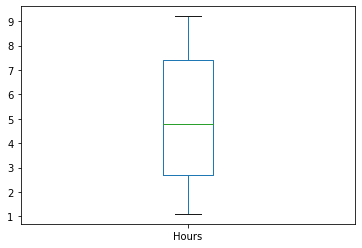

In [50]:
df.boxplot(column="Hours",grid=False)

<AxesSubplot:>

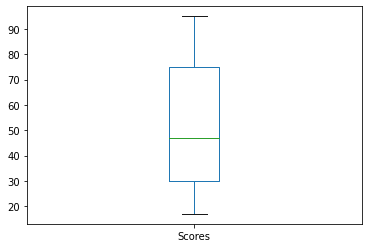

In [51]:
df.boxplot(column="Scores", grid=False)




**Interpretation:** No outliers detected

**Let us know check the distribution**

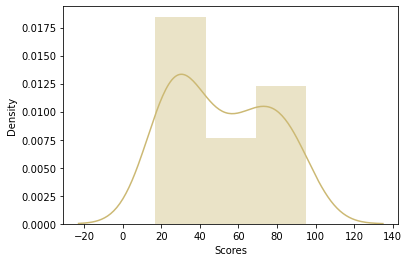

In [52]:
sns.set_color_codes()
ax = sns.distplot(df['Scores'], color="y")

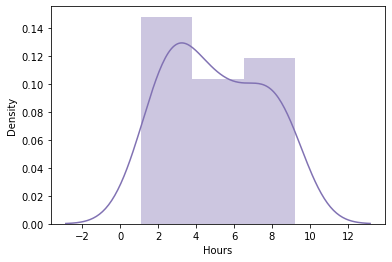

In [53]:
ax = sns.distplot(df['Hours'], color="m")

**Interpretation:** Both the variables are normally distributed 

**Let us now check the correlation between variables**

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

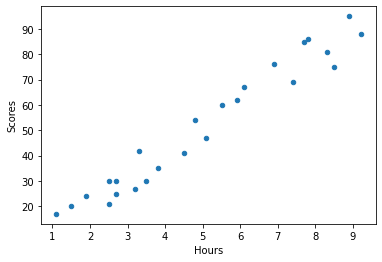

In [54]:
df.plot(kind="scatter",x="Hours",y="Scores")

In [55]:
df.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Interpretation:** There is positive linear relation between variables which means as hours increasing scores is also increasing.

# Preaparing the data

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:, 1].values

**Here we have attributes and labels, so now we have to split the data in training and test sets.**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=6)

# Training Algorithms

In [15]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [16]:
X_train = pd.DataFrame(X_train)
c = np.ones(X_train.shape[0])

X_train.insert(loc = 0, column = 'intercept', value = c)

X_train.head()

,intercept,0
0,1.0,3.2
1,1.0,2.5
2,1.0,4.5
3,1.0,3.5
4,1.0,7.4


In [17]:
SLR_model = sm.OLS(y_train, X_train).fit()
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     311.9
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           8.15e-13
Time:                        21:50:00   Log-Likelihood:                -63.071
No. Observations:                  20   AIC:                             130.1
Df Residuals:                      18   BIC:                             132.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3923      3.067      0.454      0.6

**Interpretation:** Summary is good we can predict.

In [18]:
y_train_pred = SLR_model.predict(X_train)
y_train_pred.head()

0    33.562338
1    26.525148
2    46.631405
3    36.578276
4    75.785478
dtype: float64

In [19]:
print(X_test) # Testing data - In Hours
y_pre = reg.predict(X_test) # Predicting the scores

[[3.8]
 [5.5]
 [1.5]
 [9.2]
 [8.3]]


In [20]:
new_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pre})  
new_df 

,Actual,Predicted
0,35,39.594215
1,60,56.684534
2,20,16.472019
3,88,93.881110
4,81,84.833294


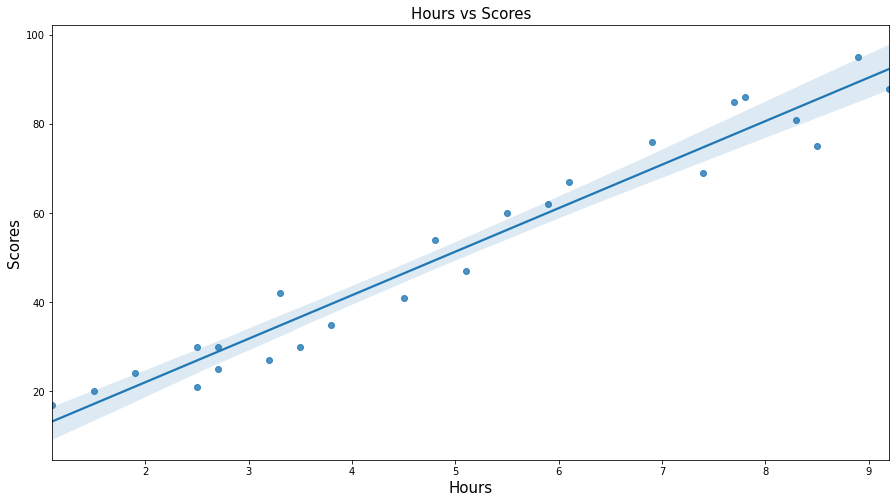

In [21]:
plt.figure(figsize = (15,8))
sns.regplot(X, y)
plt.title('Hours vs Scores', fontsize = 15)
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)

plt.show()

**What would be the student predicted percent if studies for 9.25 hrs/day**

In [57]:
hours = float(input("Enter the Number of hours: "))
prediction = reg.predict([[hours]])
print("Student will get: ", (prediction),"%")

Enter the Number of hours: 9.25
Student will get:  [94.38376623] %


**Evaluation using Metrics**

In [30]:
print("R2 Score ",metrics.r2_score(y_test, y_pre))
print("Mean absolute error", metrics.mean_absolute_error(y_test,y_pre))

R2 Score  0.9723939704109644
Mean absolute error 4.230413223140487


**Interpretation**: Overall Model is good for both train and test data but it is very close to 1 which indicates thhat model is sort of overfit,but we can improve model effciency by using  following method:


Transform/scale features

Treat outliers (if many)

Add new features/feature engineering

Use different algorithms

Model hyperparameter tuning.